In [ ]:
import tensorflow as tf
print("Version of tensorflow is : ",tf.__version__)

import matplotlib.pyplot as plt
%matplotlib inline
import io
import numpy as np
from PIL import Image
import imageio
import os

In [123]:
try:
    os.mkdir("./images")
except:
    pass

In [2]:
(train_data , train_label) , (test_data , test_label) = tf.keras.datasets.mnist.load_data()
train_data = train_data / 255.0
test_data  = test_data  / 255.0

train_label = tf.keras.utils.to_categorical(train_label)
test_label  = tf.keras.utils.to_categorical(test_label)

11493376/11490434 [==============================] - 1s 0us/step


In [117]:
plt.rc('figure' , figsize = (15,3))
plt.rc('font'   , size = 20)

def display_image(input , prediction , y_true):
    plt.clf()

    plt.yticks([])
    plt.grid(None)
    input = np.reshape(input , [10,28,28])
    input = np.swapaxes(input , 0 , 1)
    input = np.reshape(input , [28 , 28*10])
    plt.imshow(input)
    plt.xticks([28 * x + 14 for x in range(10)] , prediction)
    for i in range(len(plt.gca().xaxis.get_ticklabels())):
        if y_true[i] == prediction[i]:
            plt.gca().xaxis.get_ticklabels()[i].set_color('green')
        else:
            plt.gca().xaxis.get_ticklabels()[i].set_color('red')
    plt.grid(None)

In [118]:
class MyCallBack(tf.keras.callbacks.Callback):
    def __init__(self , inputs , des_outputs , number_images = 10 , freq = 2):
        self.inputs         = inputs
        self.des_outputs    = des_outputs
        self.number_images  = number_images
        self.freq           = freq
        self.images         = []

    def on_epoch_end(self , epoch , logs ={}):
        choice = np.random.choice(len(self.inputs) , self.number_images)
        input  = self.inputs[choice]
        output = np.argmax(self.des_outputs[choice]  , axis = 1)
        pred   = np.argmax(self.model.predict(input) , axis = 1)

        display_image(input , pred , output)

        name = "./images/fig%d.png"%epoch
        plt.savefig(name)
        image = Image.open(name)
        self.images.append(np.array(image))

        if epoch % self.freq == 0:
            plt.show()
    def on_train_end(self , logs = {}):
        imageio.mimsave('/content/animation.gif' , self.images , fps = 1)
        print(len(self.images))

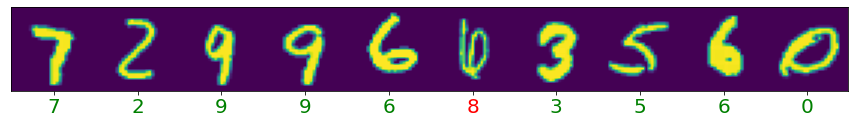

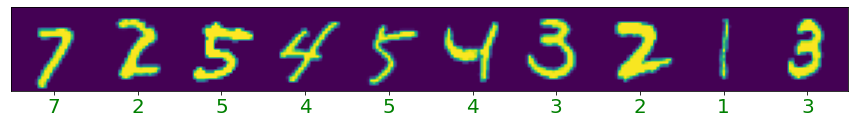

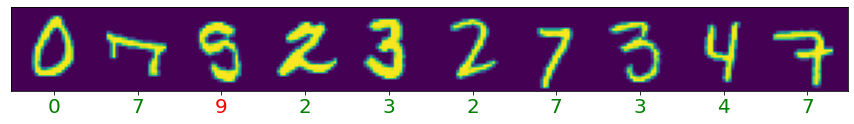

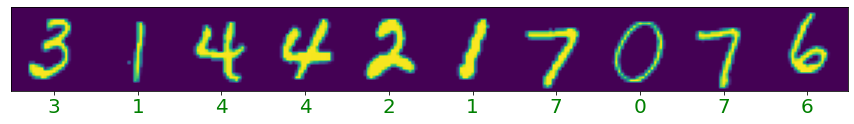

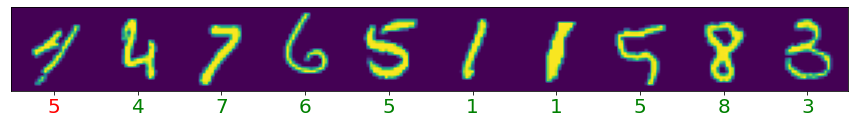

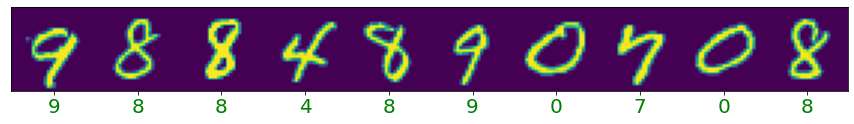

21


In [119]:
input = tf.keras.layers.Input(shape = (28 , 28))
x = tf.keras.layers.Flatten()(input)
x = tf.keras.layers.Dense(128 , activation=tf.nn.relu)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(10 , activation=tf.nn.softmax)(x)

cb = MyCallBack(inputs=test_data , des_outputs=test_label , freq=4)

model = tf.keras.models.Model(inputs = input , outputs = x)
model.compile(optimizer = 'rmsprop' , loss = tf.keras.losses.categorical_crossentropy , metrics = ['acc'])
model.fit(train_data , train_label ,
          epochs= 21,
          validation_data=(test_data , test_label) ,
          verbose=0,
          callbacks=[cb]
)